# 1 - Déploiement de l’environnement

In [1]:
# importation des bibliothèques

import pandas as pd
import numpy as np
import scipy as sc 
import matplotlib as mpl
from random import randint

# 2 - Sources de données : Manipulation

In [2]:
# importation du fichier

credit_immo_csv = pd.read_csv("Base de données/credit_immo/credit_immo.csv")
print(credit_immo_csv.head())

print("----------------------------------")

credit_immo_json = pd.read_json("Base de données/credit_immo/credit_immo.json")
print(credit_immo_json.head())

print("----------------------------------")

credit_immo_xls = pd.read_excel("Base de données/credit_immo/credit_immo.xls")
print(credit_immo_xls.head())

     ID_NOM  Niv_Etude_Bac  age contrat_de_travail  Salaire  dette_anterieure  \
0      jean            3.0   45                CDI    40000              4000   
1   VANESSA            5.0   28                CDI    30500              1320   
2  TARCISSE            0.0   55                CDI    28000             40000   
3   TIBAULT            4.0   23                CDD    15000                 0   
4     GILES            0.0   33                CDD    27000              3000   

  etat_civile  apport  enfant_a_Charge Solvable  
0           M     0.3              3.0      OUI  
1           M     0.1              0.0      OUI  
2           C     0.0              0.0      NON  
3           M     0.1              NaN      OUI  
4           C     0.1              2.0      NON  
----------------------------------
   Salaire    ID_NOM  dette_anterieure  apport contrat_de_travail  \
0    40000      jean              4000     0.3                CDI   
1    30500   VANESSA              1320  

In [3]:
# création d'une nouvelle base de données (les valeurs sont aléatoires)

nouvelle_bdd = pd.DataFrame(np.random.randint(0,100,size=(6, 4)), columns=["taux_de_ventes", "croissance_vente", "ratio_benefice", "ratio_perte"], index = range(1,7))
print(nouvelle_bdd)


   taux_de_ventes  croissance_vente  ratio_benefice  ratio_perte
1              22                27              28           46
2              52                35               0           96
3              31                 8              82           61
4              36                23              29           18
5              33                40              36           43
6              19                57              18           98


In [4]:
# utiliser la fonction reindex
# on introduit des données manquantes

nouvelle_bdd = nouvelle_bdd.reindex([1, 2, 3, 4, 5, 6, 7])


In [5]:
# on récupère les indices des valeurs manquantes
print(nouvelle_bdd.isnull())

print("-------------------------")

# on remplace les valeurs manquantes par 0.
print(nouvelle_bdd.fillna(0))

print("-------------------------")

# puis on supprime ces valeurs
nouvelle_bdd.dropna()

   taux_de_ventes  croissance_vente  ratio_benefice  ratio_perte
1           False             False           False        False
2           False             False           False        False
3           False             False           False        False
4           False             False           False        False
5           False             False           False        False
6           False             False           False        False
7            True              True            True         True
-------------------------
   taux_de_ventes  croissance_vente  ratio_benefice  ratio_perte
1            22.0              27.0            28.0         46.0
2            52.0              35.0             0.0         96.0
3            31.0               8.0            82.0         61.0
4            36.0              23.0            29.0         18.0
5            33.0              40.0            36.0         43.0
6            19.0              57.0            18.0         98.0

,taux_de_ventes,croissance_vente,ratio_benefice,ratio_perte
1,22.0,27.0,28.0,46.0
2,52.0,35.0,0.0,96.0
3,31.0,8.0,82.0,61.0
4,36.0,23.0,29.0,18.0
5,33.0,40.0,36.0,43.0
6,19.0,57.0,18.0,98.0


# 3 - Traitement des données

##  a) Importer les bibliothèques adéquates.

In [6]:
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

## b) Importer le jeu de données (credit_immo.csv).

In [7]:
credit_immo_csv = pd.read_csv("Base de données/credit_immo/credit_immo.csv")

## c) Transformer les valeurs manquantes en moyenne (SimpleImputer)

In [8]:
# Types des données

type_credit = credit_immo_csv.dtypes
print(type_credit)


ID_NOM                 object
Niv_Etude_Bac         float64
age                     int64
contrat_de_travail     object
Salaire                 int64
dette_anterieure        int64
etat_civile            object
apport                float64
enfant_a_Charge       float64
Solvable               object
dtype: object


In [9]:
bdd_moyennes=credit_immo_csv.select_dtypes(exclude=['object']).columns
bdd_moyennes


# df36=df3.select_dtypes(exclude=['object']).columns
# df36

Index(['Niv_Etude_Bac', 'age', 'Salaire', 'dette_anterieure', 'apport',
       'enfant_a_Charge'],
      dtype='object')

In [10]:
imputer = SimpleImputer(missing_values = np.nan, strategy ='mean')
imputer = imputer.fit(credit_immo_csv[bdd_moyennes]) 
credit_immo_csv[bdd_moyennes] = imputer.transform(credit_immo_csv[bdd_moyennes]).round(1)
credit_immo_csv.head(9)



,ID_NOM,Niv_Etude_Bac,age,contrat_de_travail,Salaire,dette_anterieure,etat_civile,apport,enfant_a_Charge,Solvable
0,jean,3.0,45.0,CDI,40000.0,4000.0,M,0.3,3.0,OUI
1,VANESSA,5.0,28.0,CDI,30500.0,1320.0,M,0.1,0.0,OUI
2,TARCISSE,0.0,55.0,CDI,28000.0,40000.0,C,0.0,0.0,NON
3,TIBAULT,4.0,23.0,CDD,15000.0,0.0,M,0.1,1.3,OUI
4,GILES,0.0,33.0,CDD,27000.0,3000.0,C,0.1,2.0,NON
5,ETHAN,0.0,41.0,INTERIM,40000.0,1000.0,M,0.0,4.0,NON
6,LILIANE,-1.0,29.0,CDI,50000.0,3000.0,C,0.0,0.0,NON
7,GLODI,-3.0,24.0,INTERIM,29000.0,5000.0,C,0.0,0.0,NON
8,FLORIANE,1.4,26.0,CDI,44000.0,0.0,M,0.1,1.0,OUI


In [11]:
nouvelle_bdd_moyenne=credit_immo_csv.select_dtypes(include=['object']).columns
nouvelle_bdd_moyenne

Index(['ID_NOM', 'contrat_de_travail', 'etat_civile', 'Solvable'], dtype='object')

## d) Encoder les valeurs catégoriques (LabelEncoder)

In [12]:
lenc= LabelEncoder()

# boucle for pour récupérer les données
for element in nouvelle_bdd_moyenne:
    lenc = lenc.fit(credit_immo_csv[element]) 
    credit_immo_csv[element] = lenc.transform(credit_immo_csv[element])
credit_immo_csv

,ID_NOM,Niv_Etude_Bac,age,contrat_de_travail,Salaire,dette_anterieure,etat_civile,apport,enfant_a_Charge,Solvable
0,18,3.0,45.0,1,40000.0,4000.0,1,0.3,3.0,1
1,16,5.0,28.0,1,30500.0,1320.0,1,0.1,0.0,1
2,14,0.0,55.0,1,28000.0,40000.0,0,0.0,0.0,0
3,15,4.0,23.0,0,15000.0,0.0,1,0.1,1.3,1
4,7,0.0,33.0,0,27000.0,3000.0,0,0.1,2.0,0
5,2,0.0,41.0,3,40000.0,1000.0,1,0.0,4.0,0
6,12,-1.0,29.0,1,50000.0,3000.0,0,0.0,0.0,0
7,8,-3.0,24.0,3,29000.0,5000.0,0,0.0,0.0,0
8,5,1.4,26.0,1,44000.0,0.0,1,0.1,1.0,1
9,13,3.0,37.0,1,45800.0,2000.0,1,0.2,2.0,1


In [13]:
credit_immo_csv.columns

Index(['ID_NOM', 'Niv_Etude_Bac', 'age', 'contrat_de_travail', 'Salaire',
       'dette_anterieure', 'etat_civile', 'apport', 'enfant_a_Charge',
       'Solvable'],
      dtype='object')

## e) Fractionner le jeu de données pour l’entrainement et le test (Training and Test set).

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test = train_test_split(credit_immo_csv, test_size=0.2)

# training set
scaler=StandardScaler()
scaled_data = scaler.fit_transform(X_train)
print(scaled_data)

print("---------------------------------------")

# test set
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X_test)
scaled_data




[[-0.0572036  -1.52392881 -1.30987579  1.73719807 -0.73895215 -0.19438741
  -1.41421356 -0.9877296  -1.09028812 -0.93541435]
 [-1.43008988  0.30771639  0.42697609 -0.26726124  0.64212804 -0.51939822
   0.70710678  1.234662    1.21313749  1.06904497]
 [-0.91525752 -0.42494169  0.2098696  -1.2694909  -0.87260508  0.08419327
  -1.41421356  1.97545919 -1.09028812 -0.93541435]
 [-0.74364674  2.50569063  1.07829554 -0.26726124  1.53314752  0.08419327
   0.70710678 -0.9877296   1.21313749  1.06904497]
 [-1.2584791  -0.42494169  0.64408257  0.73496842  1.08763778  1.7556774
   0.70710678  0.4938648  -1.09028812 -0.93541435]
 [-0.57203595  0.08791897 -1.09276931 -0.26726124 -0.07068755 -0.65868856
   0.70710678 -0.2469324  -0.32247959  1.06904497]
 [-0.40042517  0.67404543 -1.41842903 -0.26726124  2.424167   -0.65868856
   0.70710678  1.234662   -0.32247959  1.06904497]
 [ 1.48729348 -1.52392881  0.31842284  1.73719807 -0.73895215 -0.20367344
   0.70710678 -0.9877296  -0.32247959 -0.93541435]
 

array([[-0.55708601, -1.21267813, -0.53657009,  0.57735027,  0.83340183,
         1.71063512,  0.57735027,  0.30151134,  1.        , -1.        ],
       [-0.92847669,  0.72760688, -0.47856252,  0.57735027, -1.42319389,
        -0.69967221,  0.57735027, -0.90453403,  1.        ,  1.        ],
       [ 1.67125804,  1.21267813, -0.71059283,  0.57735027, -0.44875483,
        -0.69674471,  0.57735027, -0.90453403, -1.        ,  1.        ],
       [-0.18569534, -0.72760688,  1.72572544, -1.73205081,  1.03854689,
        -0.3142182 , -1.73205081,  1.50755672, -1.        , -1.        ]])

## f) Mise à l’échelle des features (StandardScaler).

In [15]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
scaled_df = scaler.fit_transform(credit_immo_csv)
scaled_df = pd.DataFrame(scaled_df)
scaled_df

,0,1,2,3,4,5,6,7,8,9
0,1.643168,0.585653,0.699645,-0.169300,-0.159400,-0.342231,0.679366,1.243540,1.327744,1.054093
1,1.278019,1.337505,-0.777383,-0.169300,-0.613929,-0.458469,0.679366,-0.331611,-1.059682,1.054093
2,0.912871,-0.542125,1.568485,-0.169300,-0.733541,1.219175,-1.471960,-1.119186,-1.059682,-0.948683
3,1.095445,0.961579,-1.211803,-1.241532,-1.355528,-0.515720,0.679366,-0.331611,-0.025131,1.054093
4,-0.365148,-0.542125,-0.342963,-1.241532,-0.781386,-0.385603,-1.471960,-0.331611,0.531935,-0.948683
5,-1.278019,-0.542125,0.352109,1.975164,-0.159400,-0.472348,0.679366,-1.119186,2.123552,-0.948683
6,0.547723,-0.918051,-0.690499,-0.169300,0.319051,-0.385603,-1.471960,-1.119186,-1.059682,-0.948683
7,-0.182574,-1.669903,-1.124919,1.975164,-0.685696,-0.298859,-1.471960,-1.119186,-1.059682,-0.948683
8,-0.730297,-0.015828,-0.951151,-0.169300,0.031981,-0.515720,0.679366,-0.331611,-0.263873,1.054093
9,0.730297,0.585653,0.004573,-0.169300,0.118102,-0.428976,0.679366,0.455965,0.531935,1.054093


# 4 - Visualisation de données

Consignes :

Chargez le fichier Montant_Temps.csv. Puis en utilisation la fonction iloc, 
découpez vos données en données d’abscisses et d’ordonnées qui représentent 
respectivement le temps et le montant du capital. Puis tracez le montant du 
capital en fonction du temps (avec la focntion plot()). 
Puis sauvegardez vos graphiques.

In [16]:
# Chargement du fichier

montant_temps= pd.read_csv("Base de données/Montant_Temps.csv")

# On peut afficher quelques éléments du fichier :
montant_temps.head()

,Montant_du_capitale,Temps
0,1,5
1,12,6
2,13,7
3,2,8
4,3,9


In [17]:
# fonction iloc

# ordonnée= montant du capital
y=ordonnee = montant_temps.iloc[:,[0]]


# abscisse  = temps
x=abscisse = montant_temps.iloc[:,[1]]

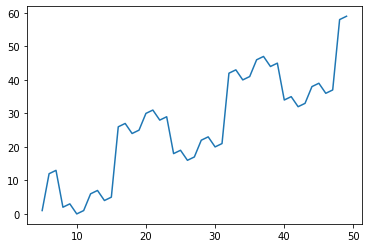

In [18]:
# On trace le montant du capital en fonction du temps (avec la fonction plot())

# montant_temps.plot()

# 1ère version :
import numpy as np
import matplotlib.pyplot as plt

plt.plot(x, y)

plt.show()

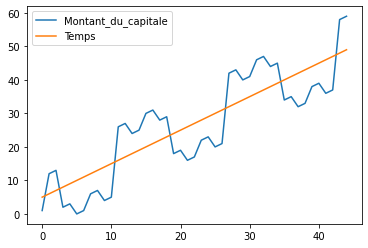

In [19]:
# on sauvegarde le graphique dans un fichier

ax = montant_temps.plot()  
fig = ax.get_figure()
fig.savefig('./graphique')

## a) Rajoutez du style à vos graphiques

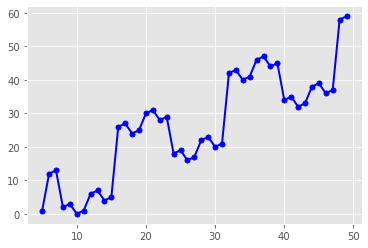

In [20]:
from matplotlib import pyplot
data2 =pd.read_csv("Base de données/Montant_Temps.csv",sep=',')
x=data2.Montant_du_capitale
# x=x.iloc[]
y=data2.Temps
# y=y.iloc[]
plt.style.use('ggplot')
plt.plot(y, x, color='b', marker='.', linestyle='-',
     linewidth=2, markersize=10)


## b) Visualisation de données sous forme de nuage de points

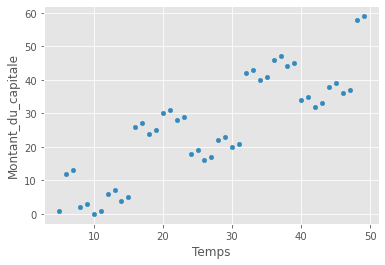

In [21]:
montant_temps.plot.scatter("Temps", "Montant_du_capitale")

# 5 - Analyse de données

## 5.1 - Mesure de tendance centrale

Mesure de tendance centrale est le nombre qui caractérise le centre d’une distribution et la position des diverses valeurs de la distribution par rapport à ce centre. Il s’agit ici de calculer la moyenne, le médiane et le mode d’une distribution. Vous avez à disposition le fichier nommé tendance_centrale.csv. Chargez ces données puis en utilisant les outils nécessaires appliquez la mesure de tendance centrale sur ces données.

In [22]:
# chargement des données 
tendance_centrale = pd.read_csv("Base de données/tendance_centrale.csv")

# on peut afficher les 5 premiers éléments de la bdd
tendance_centrale.head()

# moyenne
print("moyenne :\n", tendance_centrale.mean())

print("\n")

# médiane
print("médiane :\n", tendance_centrale.median())

print("\n")

# mode de distribution
print(tendance_centrale.mode())


moyenne :
 Age       45.647059
Rating     4.438824
dtype: float64


médiane :
 Age       49.0
Rating     4.3
dtype: float64


     Nom   Age  Rating
0  perez  53.0    3.78
1    NaN   NaN    3.95
2    NaN   NaN    4.30
3    NaN   NaN    4.80
4    NaN   NaN    5.98


## 5.2 - Analyse de la variance

En statistique, l’analyse de la variance est un modèle statistique utilisé pour comparer les moyennes d’échantillons. Ce test s’applique lorsque l’on mesure une ou plusieurs variables explicatives catégorielle (appelées alors facteurs de variabilité, leurs différentes modalités étant parfois appelées « niveaux ») qui ont de l’influence sur la loi d’une variable continue à expliquer. Faites une analyse de variance sur le jeu de données issu de tendance_centrale.csv.

In [23]:
import scipy.stats as stats
liste=[]
a = tendance_centrale['Age'].unique()
for i in tendance_centrale['Age'].unique():
    a = tendance_centrale[tendance_centrale['Age'] == i]['Rating']
    # to_liste() pour apprendre dans 1 liste
    liste.append(a.to_list())
liste


[[4.53, 3.98],
 [3.54, 4.9],
 [5.59, 3.8, 4.3, 4.3],
 [3.5, 4.8, 4.8],
 [3.78, 3.78],
 [5.98, 5.98],
 [3.95, 3.95]]

# 5.3 - Analyse de corrélations





L’objectif de l’analyse de corrélation est étudier la liaison entre deux variables quantitative. Soient X et Y deux grandeurs statistiques quantitatives observées. On souhaite :



   Déterminer s’il existe une relation entre X et Y .
    Caractériser la forme de la liaison(la relation) entre X et Y (positive ou négative,linéaire ou non linéaire,monotone ou non monotone)
    Tester si la liaison est statistiquement significative
    Quantifier l’intensité de la liaison



Utlilisez le jeu de données (iris.csv)

In [24]:
data_iris=pd.read_csv("Base de données/iris.csv")
print ('Matrice de covariance :\n', data_iris.cov())
print ('Matrice de correlation :\n', data_iris.corr())

Matrice de covariance :
                 longueur_sepal  largeur_sepal  longueur_petal  largeur_petal
longueur_sepal        0.685694      -0.042434        1.274315       0.516271
largeur_sepal        -0.042434       0.189979       -0.329656      -0.121639
longueur_petal        1.274315      -0.329656        3.116278       1.295609
largeur_petal         0.516271      -0.121639        1.295609       0.581006
Matrice de correlation :
                 longueur_sepal  largeur_sepal  longueur_petal  largeur_petal
longueur_sepal        1.000000      -0.117570        0.871754       0.817941
largeur_sepal        -0.117570       1.000000       -0.428440      -0.366126
longueur_petal        0.871754      -0.428440        1.000000       0.962865
largeur_petal         0.817941      -0.366126        0.962865       1.000000


# 5.3.2 - Analyse graphique :




L’analyse graphique est une bonne manière de comprendre les différentes caractéristiques énumérées ci-dessus. Le graphique "nuage de points" est l’outil privilégié. Nous plaçons en abscisse la variable X, en ordonnée la variable Y, chaque observation est positionnée dans le repère ainsi constitué. L’intérêt est multiple : nous pouvons situer les proximités entre les individus;



   Etudier la forme globale des points, voir notamment s’il existe une forme de liaison ou de régularité;
    Détecter visuellement les points qui s’écartent des autres, les observations atypiques;
    Vérifier s’il n’y a pas de regroupement suspects, laissant entendre qu’il y a en réalité une troisième variable qui influence le positionnement des individus. . .
    A partir de la base de données qui vous est fournie, illustrez quelques types de liaisons qui peuvent exister entre 2 variables.



Utlilisez le jeu de données (iris.csv)

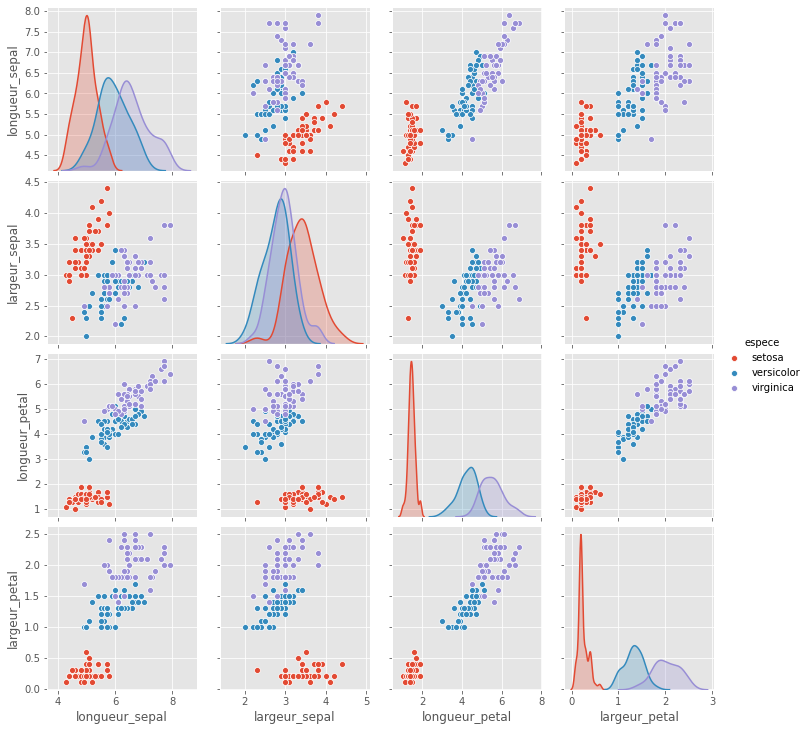

In [25]:
import seaborn as sns
sns.pairplot(data_iris, hue='espece')



On remarque une correlation entre la largeur des pétales et la longueur des pétales ainsi qu'entre la longueur des pétales et la longueur des sépales.
on remarque une faible corrélation entre la longueur et largeur des sépales( test de pearson)
On remarque que la  longueur des pétales des setosa est plus petites que pour les autres espèces 


# 5.3.3 - Analyse mathématique :

coefficient de corrélation de Pearson Le coefficient de corrélation linéaire simple, dit de Bravais-Pearson(ou de Pearson), est une normalisation de la covariance par le produit des écarts-type des variables :

r(x,y )= COV(X,Y) / (E(X) x E(Y))



Avec les outils et bibliothèques de Python, calculez le coefficient de corrélation de Pearson sur la base de données fournie et interprétez les résultats.

Utlilisez le jeu de données (iris.csv)



Pou aller loin:


Essayer d'integrer toutes ces fonctionnalités dans une interface graphique et qui permet de visualiser les différentes extensions des fichier pour ne plus à avoir passer par la console.

In [26]:
x=data_iris['longueur_petal']
y=data_iris['largeur_petal']
sc.stats.pearsonr(x,y)


(0.962865431402796, 4.6750039073285846e-86)